# Problem statement

Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

# Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print("All Libraries are loaded succesfully")

All Libraries are loaded succesfully


In [2]:
df = pd.read_csv("temp.csv")
print("Temperature data loaded successfully")

Temperature data loaded successfully


In [3]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
df.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [5]:
df.shape

(7752, 25)

So,in this dataset we can see that there is 7752 rows and 25 columns present.

# Label Description

In [6]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

Feature column:-

station - used weather station number: 1 to 25

Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')

Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6

Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9

LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5

LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100

LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5

LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6

LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9

LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4

LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97

LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97

LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98

LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97

LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7

LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6

LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8

LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7

lat - Latitude (Â°): 37.456 to 37.645

lon - Longitude (Â°): 126.826 to 127.135

DEM - Elevation (m): 12.4 to 212.3

Slope - Slope (Â°): 0.1 to 5.2

Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9

Target column:-

Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9

Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

# Exploratory data analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


only date column is in object data type and all others are float data types.

In [9]:
#extracting date month and year from date column.

df['date']=pd.to_datetime(df.Date, format='%d-%m-%Y').dt.day
df['month']=pd.to_datetime(df.Date, format='%d-%m-%Y').dt.month
df['year']=pd.to_datetime(df.Date, format='%d-%m-%Y').dt.year

In [10]:
df.drop(['Date'],inplace=True,axis=1)

In [11]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,date,month,year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30.0,6.0,2013.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30.0,6.0,2013.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30.0,6.0,2013.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30.0,6.0,2013.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30.0,6.0,2013.0


In [12]:
df.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
date                 2
month                2
year                 2
dtype: int64

so there is alot of null values in the dataset.

In [13]:
df.dropna(subset=['date','month','year'],inplace=True)

In [14]:
for i in df.columns:
    df[i]=df[i].fillna(df[i].mean())

replacing null values with mean of that particular column

In [15]:
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
date                0
month               0
year                0
dtype: int64

<AxesSubplot:>

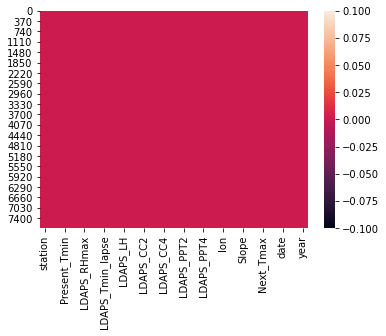

In [16]:
sns.heatmap(df.isnull())

now there is no null value in dataset.

In [17]:
print("Unique values of each columns with counts-")
for i in df.columns:
    print(i,'=')
    print(df[i].value_counts())
    print('\n')

Unique values of each columns with counts-
station =
25.0    310
12.0    310
2.0     310
3.0     310
4.0     310
5.0     310
6.0     310
7.0     310
8.0     310
9.0     310
10.0    310
11.0    310
13.0    310
23.0    310
14.0    310
15.0    310
16.0    310
18.0    310
20.0    310
22.0    310
24.0    310
17.0    310
19.0    310
21.0    310
1.0     310
Name: station, dtype: int64


Present_Tmax =
31.4    112
29.4    111
29.1    108
29.7    107
30.6    105
       ... 
20.7      1
20.4      1
20.3      1
21.2      1
20.0      1
Name: Present_Tmax, Length: 168, dtype: int64


Present_Tmin =
24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
15.7      1
16.2      1
29.6      1
14.6      1
11.3      1
Name: Present_Tmin, Length: 156, dtype: int64


LDAPS_RHmin =
56.758747    75
51.810596     2
71.658089     2
77.030350     2
49.358723     1
             ..
44.005089     1
58.655628     1
58.761993     1
42.186558     1
71.359451     1
Name: LDAPS_RHmin, Length: 7673, dtyp

# Data Visualization

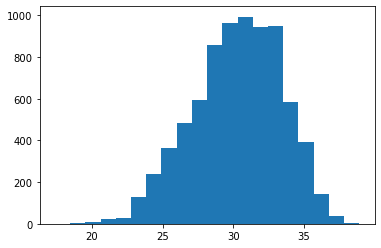

In [20]:
plt.hist(df['Next_Tmax'],bins=20)
plt.show()

maximum next-tmax count is in between 30-32.

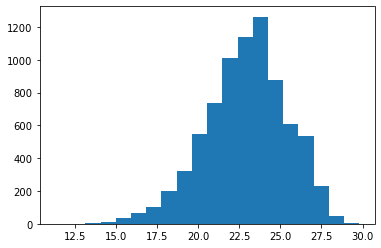

In [21]:
plt.hist(df['Next_Tmin'],bins=20)
plt.show()

maximum next-tmin count is in between 23-24.

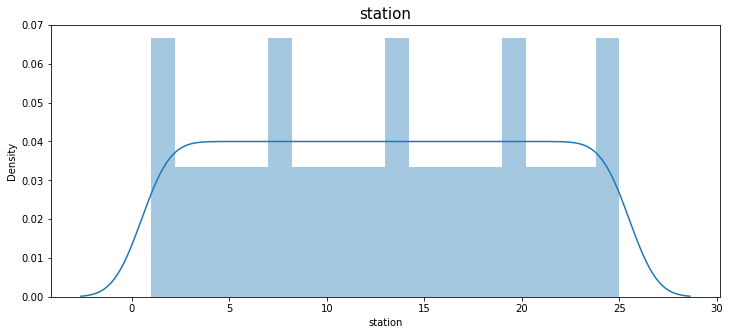

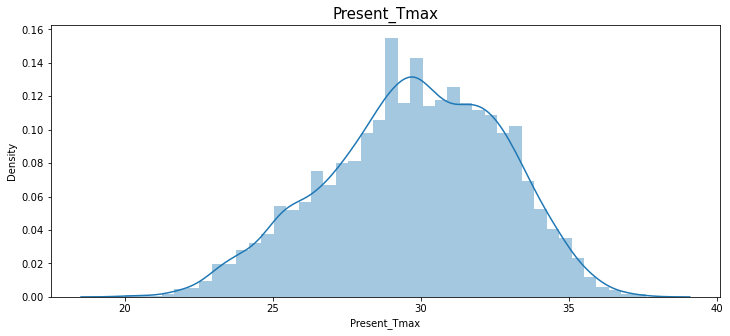

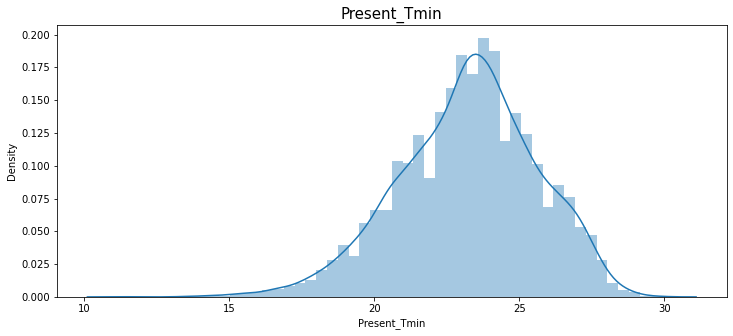

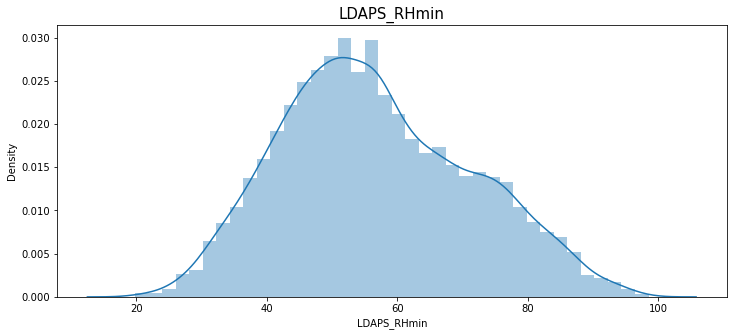

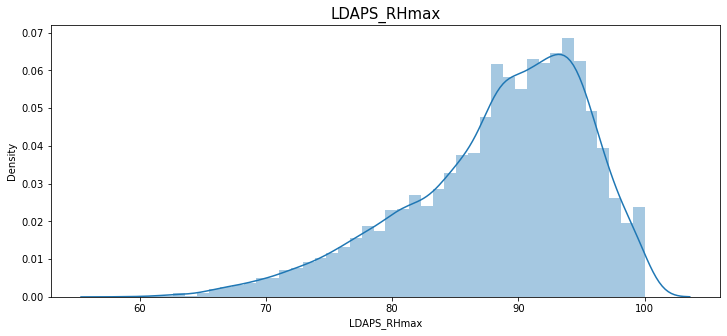

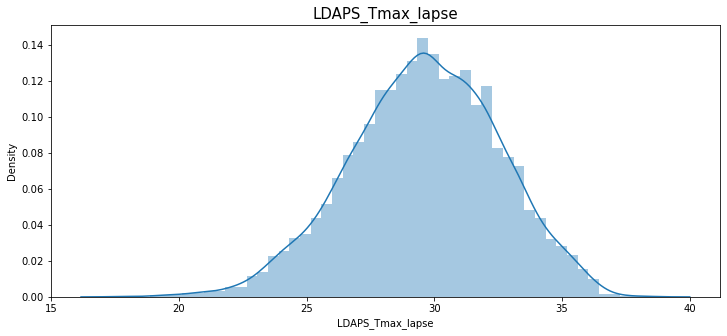

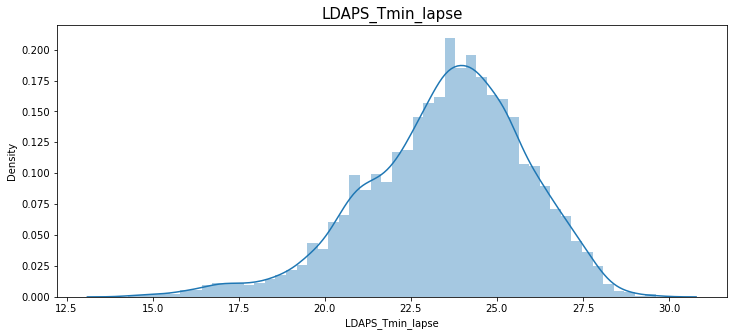

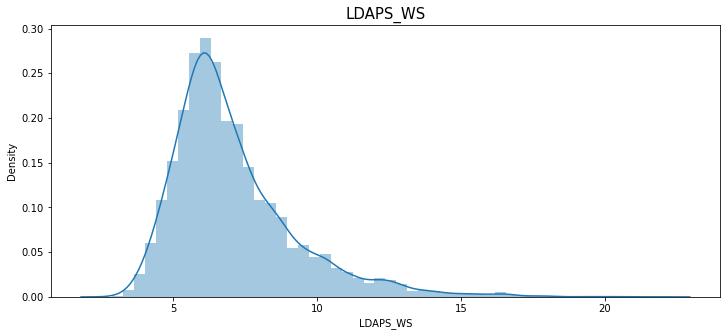

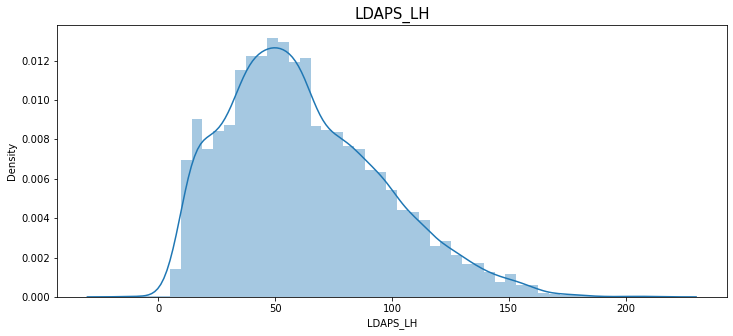

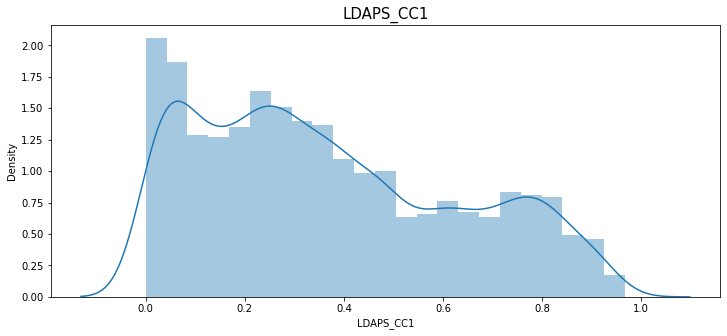

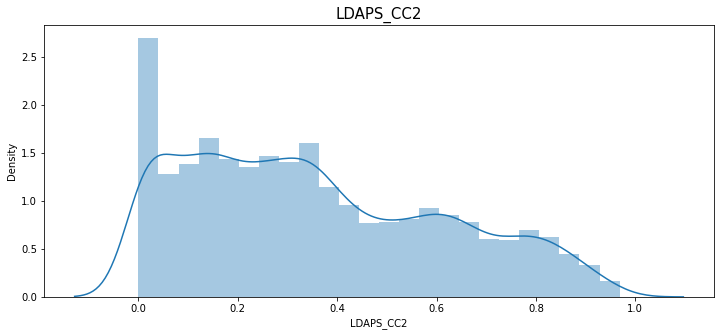

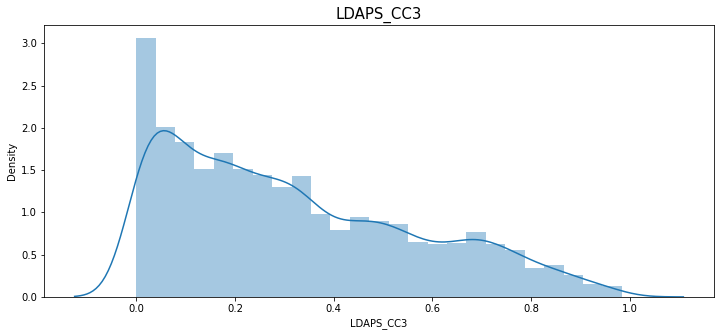

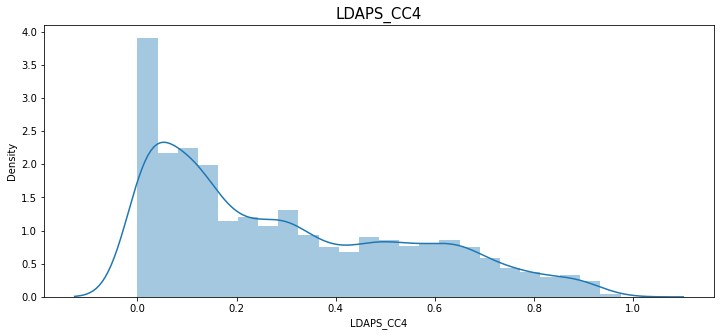

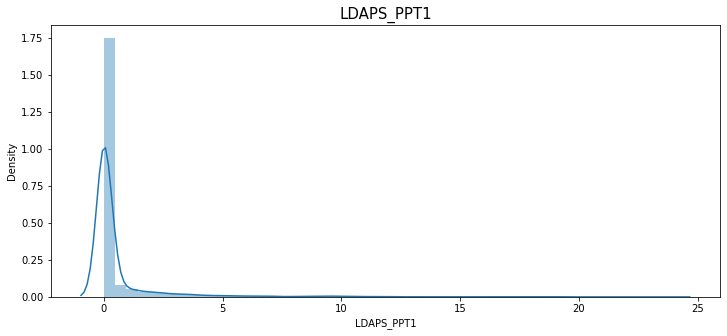

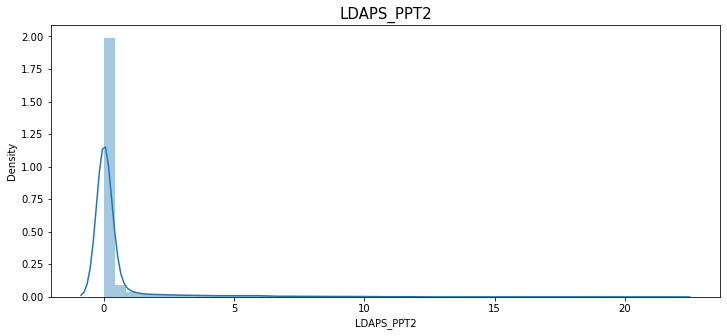

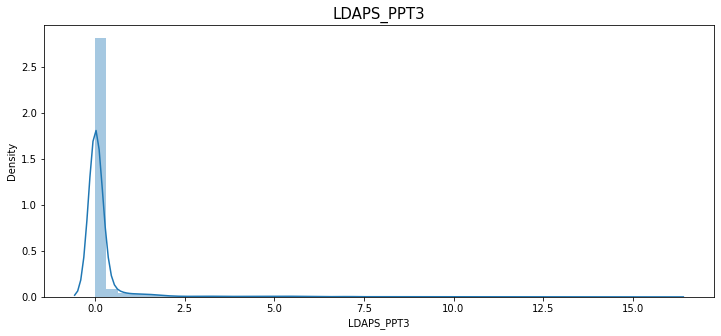

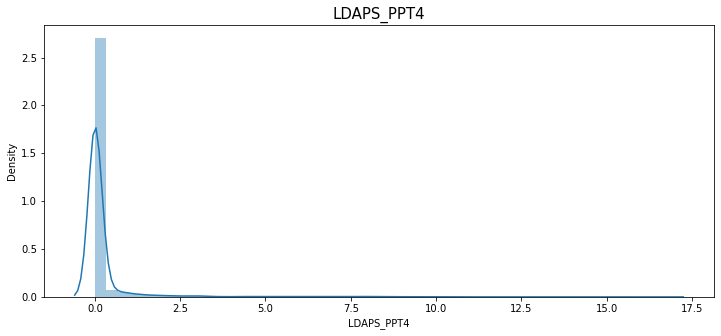

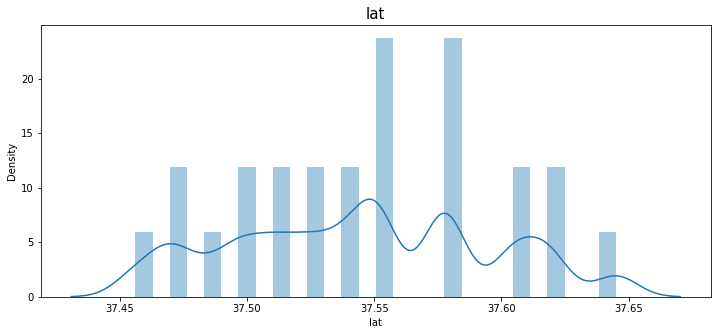

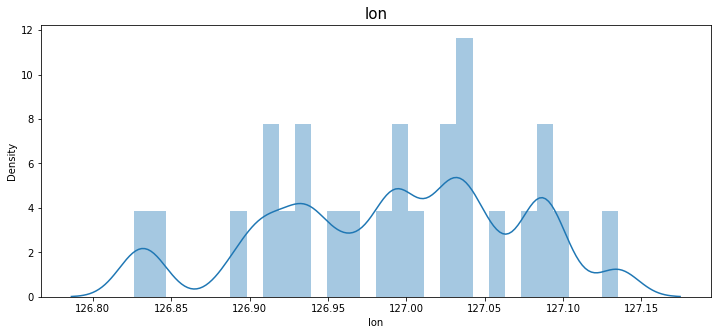

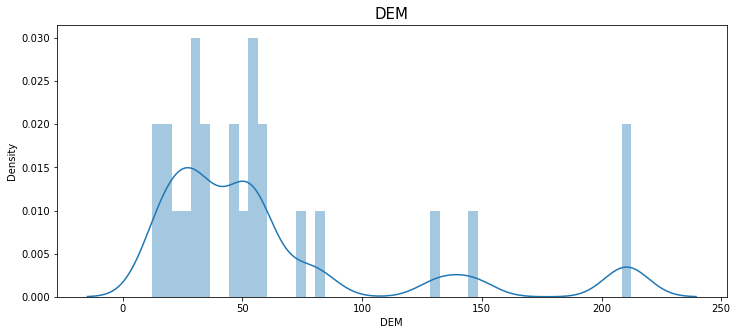

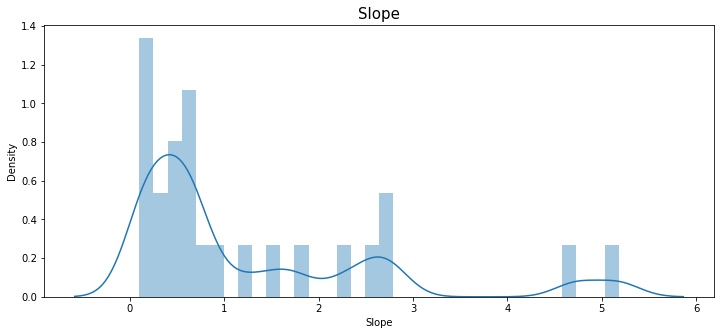

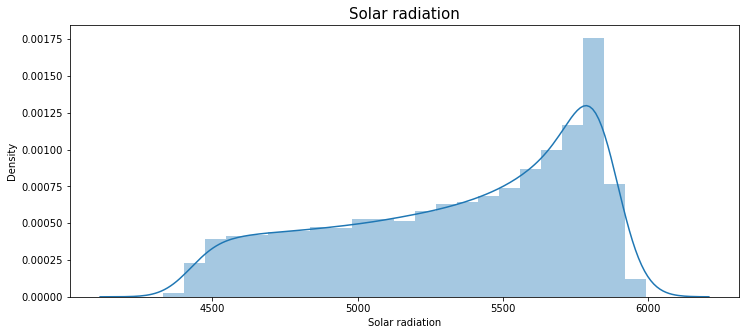

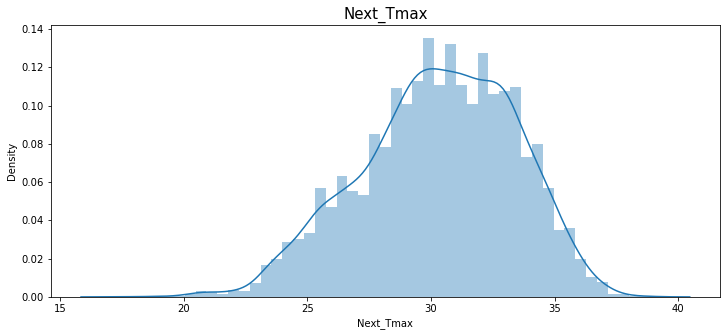

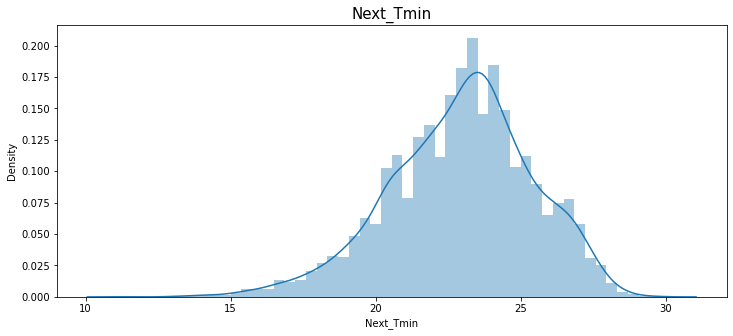

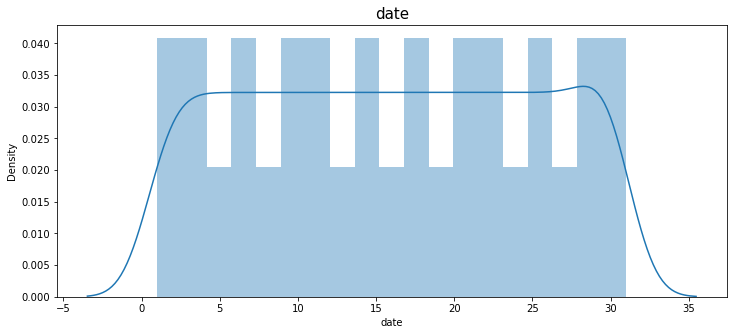

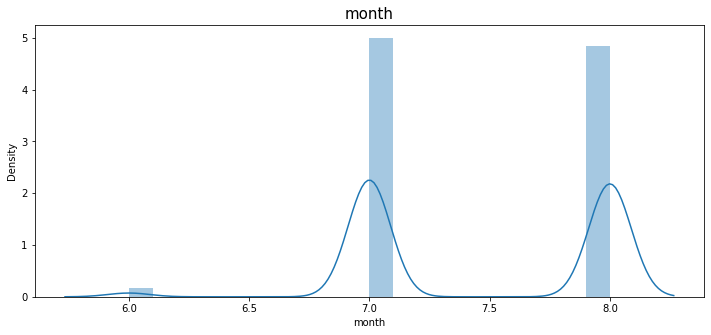

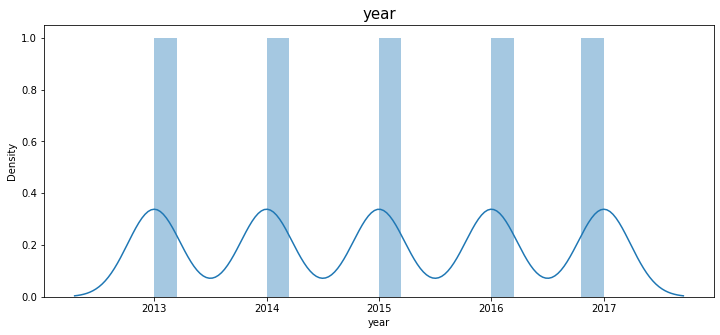

In [24]:
for i in df.columns:
    plt.figure(figsize=(12,5))
    sns.distplot(df[i])
    plt.title(i,fontsize=15)
    plt.show()

from the above observations, we can get-

Present_Tmax,Present_Tmin and LDAPS_RHmin have nearly uniform distribution

LDAPS_RHmax is right skewed

LDAPS_Tmax_lapse,LDAPS_WS and LDAPS_Tmin_lapse have uniform distribution.

LDAPS_LH is  left skewed.

LDAPS_CC1, LDAPS_CC2, LDAPS_CC3 and LDAPS_CC4 are left skewed.

solar radiation is left skewed

 lat and long are not normally distributed, DEM is also not normally distributed

LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3 and LDAPS_PPT4 have most of the values near to 0.

Next_Tmax and Next_Tmin have uniform distribution

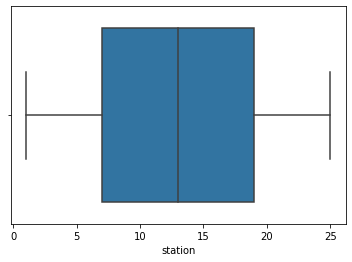

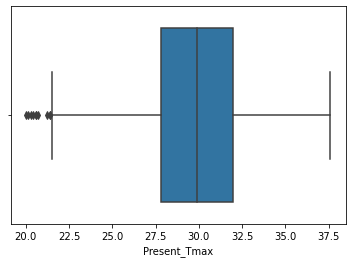

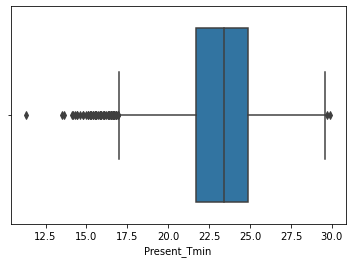

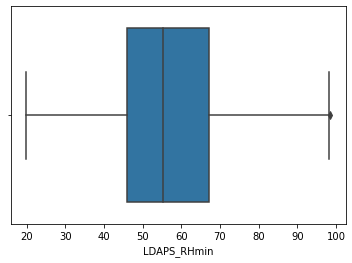

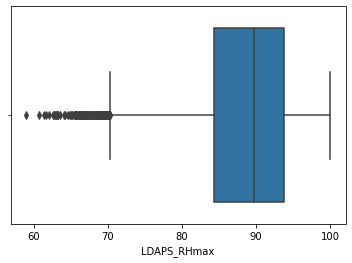

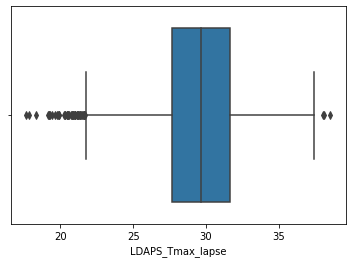

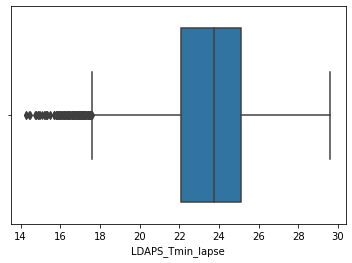

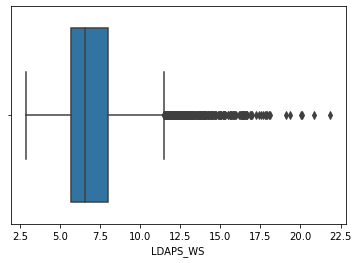

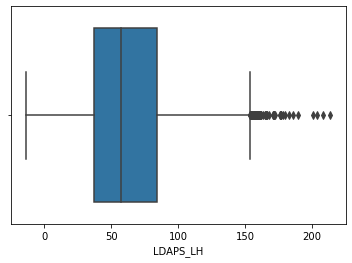

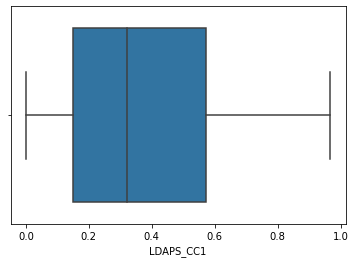

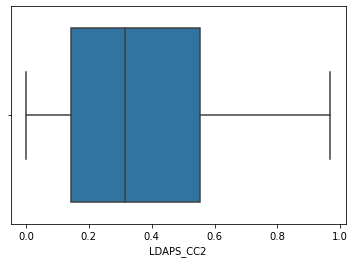

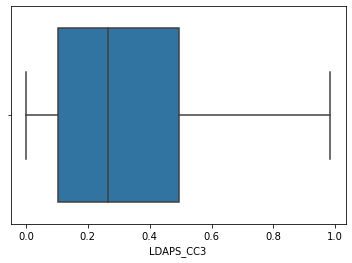

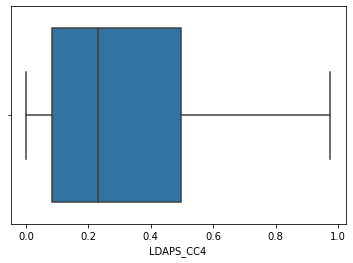

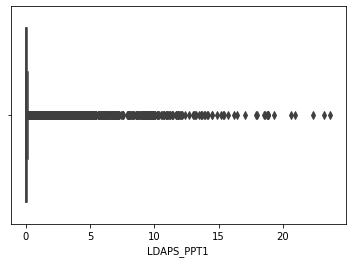

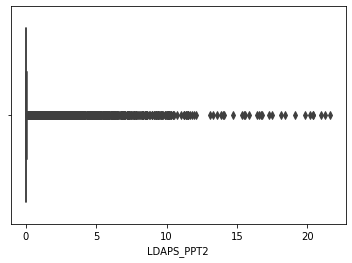

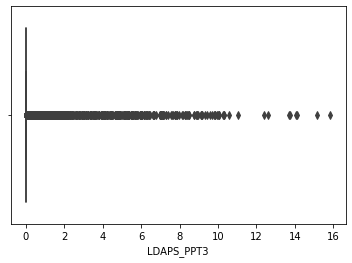

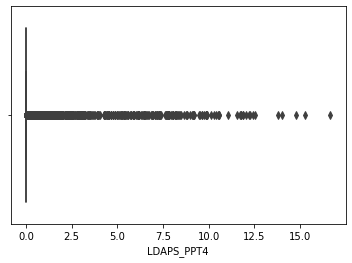

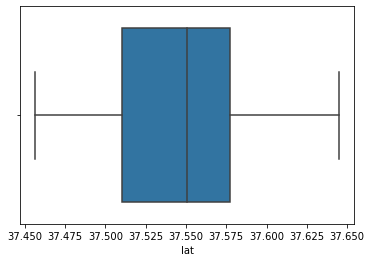

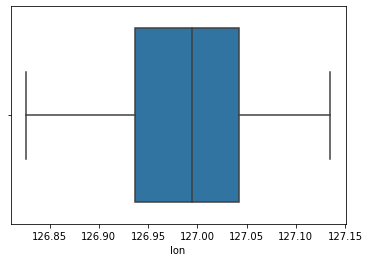

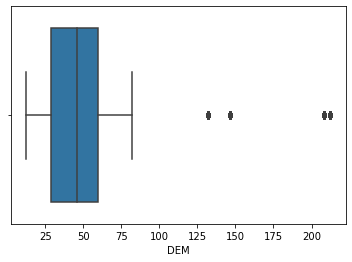

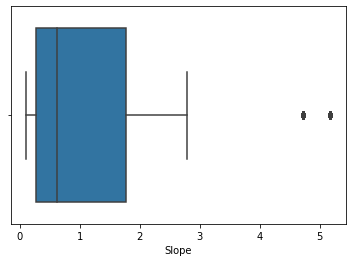

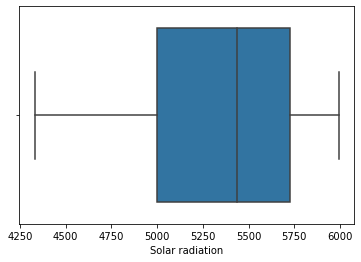

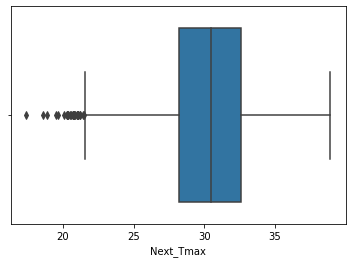

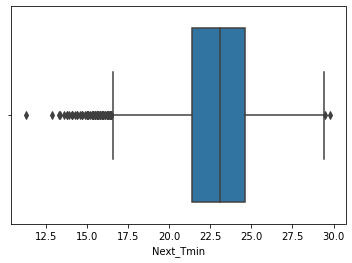

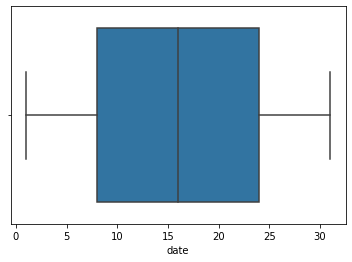

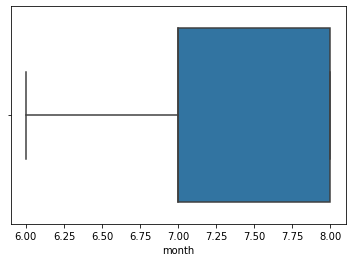

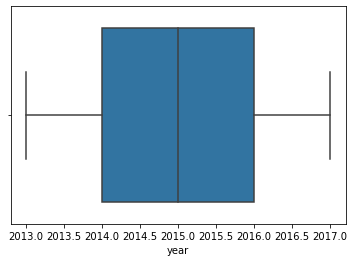

In [25]:
for i in df.columns:
    plt.subplots()
    sns.boxplot(df[i])

Present Tmax, Present_Tmin ,LDAPS_RHmax, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, LDAPS_WS, LDAPS_LH,PPT1,PPT2,PPT3,PPT4 and DEM slope have outliers

where ppt has most of the values near to 0, remaining other values far from 0 are shown as outliers.

Dem and slope has few outliers

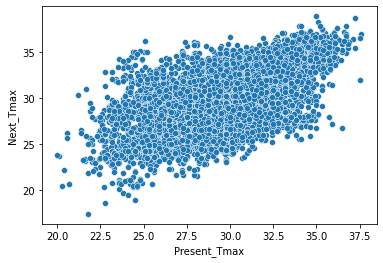

In [26]:
sns.scatterplot(df['Present_Tmax'],df['Next_Tmax'])
plt.show()

Present_Tmax and Next_Tmax have positive linear relation.

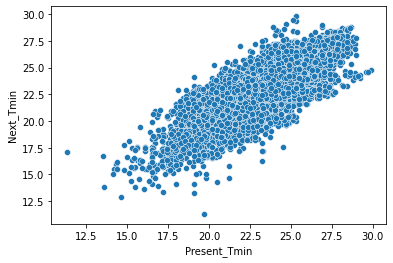

In [27]:
sns.scatterplot(df['Present_Tmin'],df['Next_Tmin'])
plt.show()

Present_Tmin and Next_Tmin have positive linear relation.

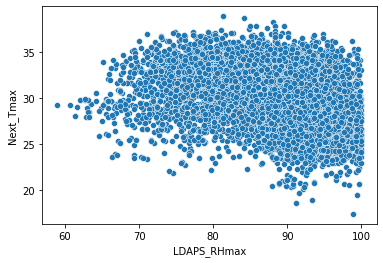

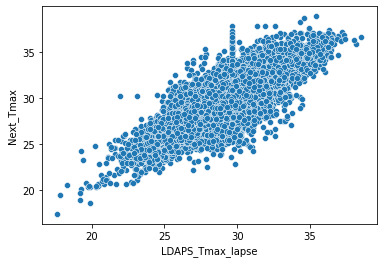

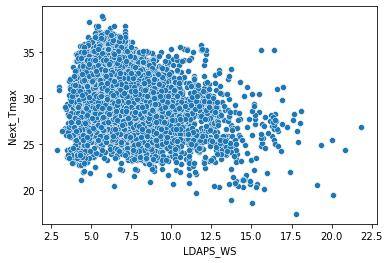

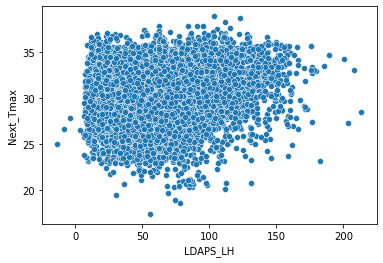

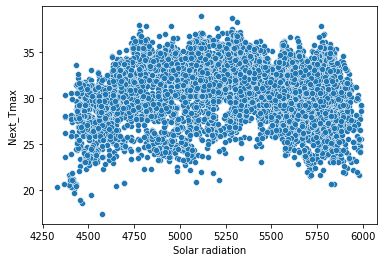

In [28]:
col=['LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_WS','LDAPS_LH','Solar radiation']
for i in col:
    sns.scatterplot(df[i],df['Next_Tmax'])
    plt.show()

LDAPS_Tmax_lapse have positive linear relation with Next_Tmax.

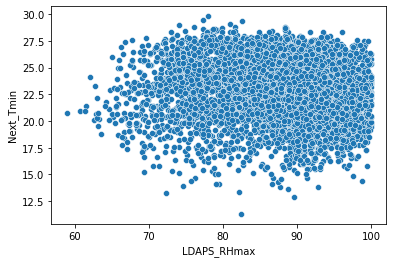

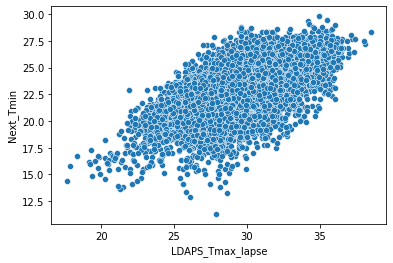

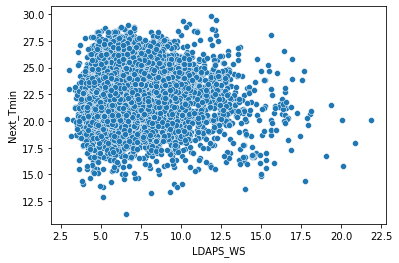

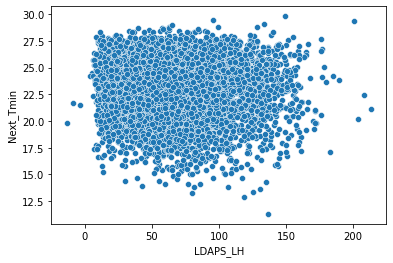

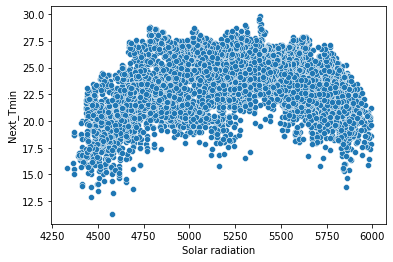

In [29]:
for i in col:
    sns.scatterplot(df[i],df['Next_Tmin'])
    plt.show()

LDAPS_Tmax_lapse have positive linear relation with Next_Tmin.

# Correlation

In [30]:
print('Data description')
df.describe().T

Data description


,count,mean,std,min,25%,50%,75%,max
station,7750.0,13.000000,7.211568,1.000000,7.000000,13.000000,19.000000,25.000000
Present_Tmax,7750.0,29.768464,2.953516,20.000000,27.800000,29.900000,32.000000,37.600000
Present_Tmin,7750.0,23.225742,2.398327,11.300000,21.700000,23.400000,24.875000,29.900000
LDAPS_RHmin,7750.0,56.758747,14.585101,19.794666,46.048225,55.313244,67.032715,98.524734
LDAPS_RHmax,7750.0,88.377125,7.149011,58.936283,84.318649,89.699505,93.703491,100.000153
LDAPS_Tmax_lapse,7750.0,29.613845,2.928357,17.624954,27.693733,29.662273,31.682567,38.542255
LDAPS_Tmin_lapse,7750.0,23.512997,2.330881,14.272646,22.115268,23.735942,25.133460,29.619342
LDAPS_WS,7750.0,7.096501,2.166519,2.882580,5.686498,6.563068,8.005363,21.857621
LDAPS_LH,7750.0,62.495273,33.516382,-13.603212,37.547426,57.310630,83.891182,213.414006
LDAPS_CC1,7750.0,0.368744,0.261096,0.000000,0.148339,0.320110,0.571665,0.967277


from the observations, we can get-

mean Present Tmax is 29.7 C

mean Present Tmin is 23.2 C

mean Next_Tmax is 30.3 C

mean Next_Tmin is 22.9 C

Majority of LDAPS PPTS value is 0%

The standard deviation is low in most of the columns which means data is not much deviated.

<AxesSubplot:>

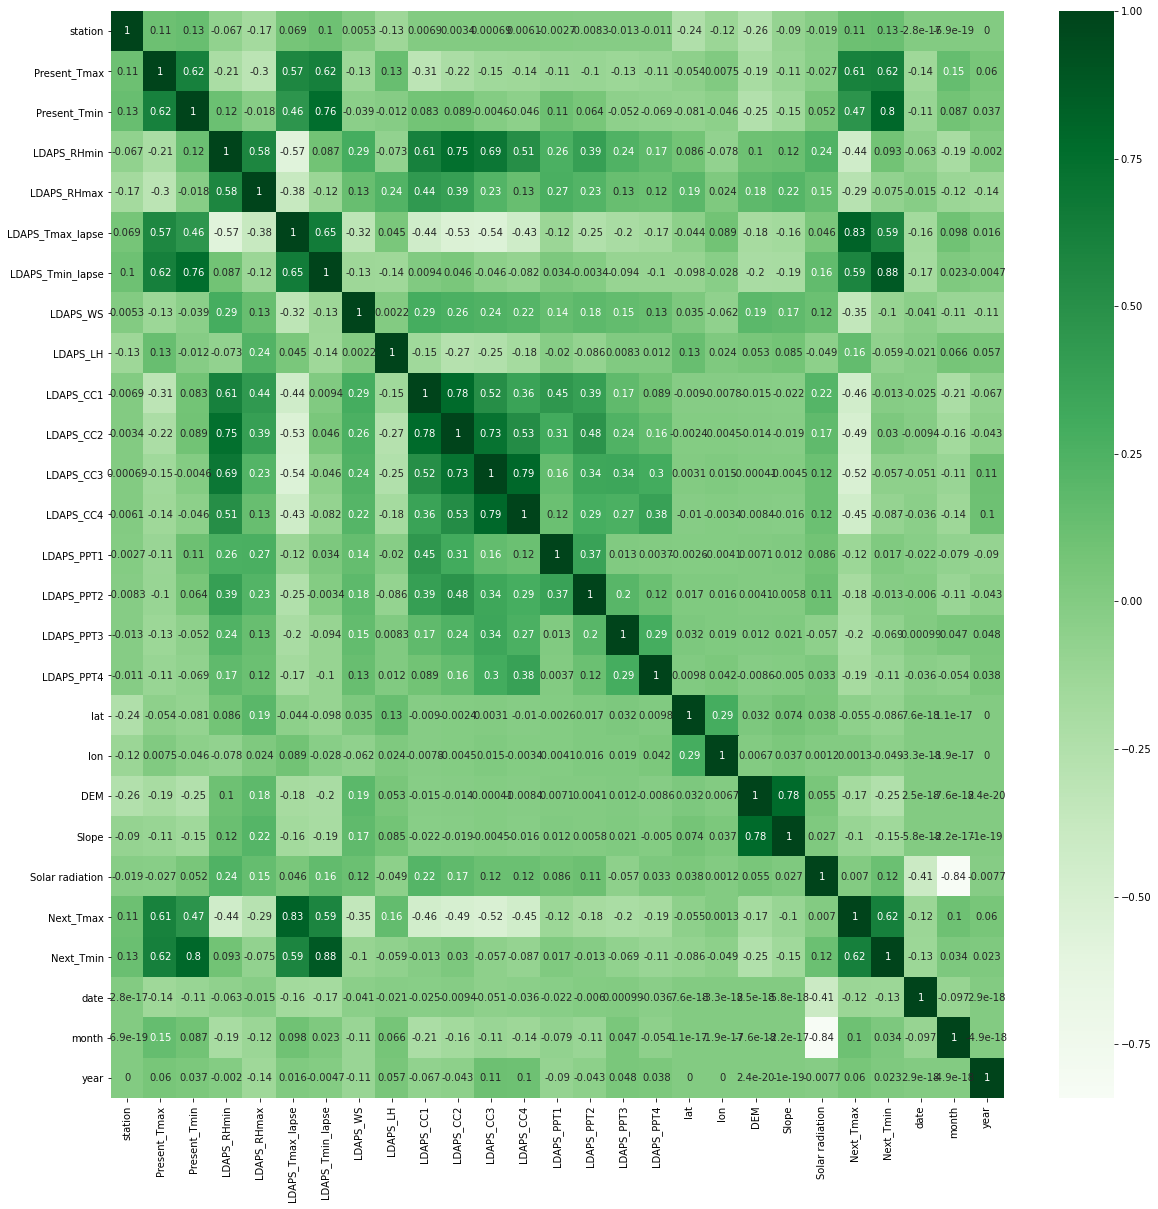

In [32]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='Greens')

The Tmax, Tmin are having significant positive correlation.( present, next, ldaps tmax and tmin)

Month is highly negatively correlated with solar radiation. And it is obvious that, during the rainy season, solar radiation will be less

DEM and slope are also significantly correlated

In [33]:
#Removing month, year column as we need to predcit the next day temperature based on the present day data therefore month,year in not needed.
df.drop(['month','year'],axis=1,inplace=True)

# Data Cleaning

# Applying zscore

In [34]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(7750, 25)

In [35]:
threshold=3
print(np.where(z>3))

(array([  25,   25,   26, ..., 7743, 7744, 7744], dtype=int32), array([ 7, 14, 14, ...,  2,  2,  6], dtype=int32))


In [36]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(7750, 25)
(6888, 25)


In [37]:
df=df_new
print(df.shape)

(6888, 25)


In [38]:
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
date                0
dtype: int64

no null values present in the dataset

Now we are going to divide the target and feature columns

In [39]:
x=df.drop(['Next_Tmax','Next_Tmin'],axis=1)
y_Tmax=df['Next_Tmax']
y_Tmin=df['Next_Tmax']

# checking skewness

In [41]:
x.skew()

station             0.002824
Present_Tmax       -0.274051
Present_Tmin       -0.225748
LDAPS_RHmin         0.305364
LDAPS_RHmax        -0.687977
LDAPS_Tmax_lapse   -0.107951
LDAPS_Tmin_lapse   -0.382891
LDAPS_WS            1.088602
LDAPS_LH            0.569070
LDAPS_CC1           0.595347
LDAPS_CC2           0.501696
LDAPS_CC3           0.700525
LDAPS_CC4           0.711015
LDAPS_PPT1          3.723285
LDAPS_PPT2          4.860241
LDAPS_PPT3          5.479831
LDAPS_PPT4          5.927316
lat                 0.108039
lon                -0.275324
DEM                 1.765466
Slope               1.595105
Solar radiation    -0.505080
date                0.001171
dtype: float64

# Handling skewness

In [46]:
#the columns with unacceptable skewness-
col = ['LDAPS_WS','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope']
for i in col:
    x[i]=np.cbrt(x[i]).skew()

In [47]:
x.skew()

station             0.002824
Present_Tmax       -0.274051
Present_Tmin       -0.225748
LDAPS_RHmin         0.305364
LDAPS_RHmax        -0.687977
LDAPS_Tmax_lapse   -0.107951
LDAPS_Tmin_lapse   -0.382891
LDAPS_WS            0.000000
LDAPS_LH            0.569070
LDAPS_CC1           0.595347
LDAPS_CC2           0.501696
LDAPS_CC3           0.700525
LDAPS_CC4           0.711015
LDAPS_PPT1          0.000000
LDAPS_PPT2          0.000000
LDAPS_PPT3          0.000000
LDAPS_PPT4          0.000000
lat                 0.108039
lon                -0.275324
DEM                 0.000000
Slope               0.000000
Solar radiation    -0.505080
date                0.001171
dtype: float64

# Standard Scaling

In [48]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
k=sc.fit_transform(x)
x=pd.DataFrame(k,columns = x.columns)

In [49]:
x.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,date
0,-1.671640,-0.434230,-0.828316,0.192638,0.437419,-0.663281,-0.291152,-1.0,0.225305,-0.444443,...,-1.0,0.0,1.0,0.0,1.215021,0.002447,-1.0,0.0,1.552140,1.580411
1,-1.532756,0.687208,-0.741636,-0.241178,0.363360,-0.013231,0.172935,-1.0,-0.301655,-0.478152,...,-1.0,0.0,1.0,0.0,1.215021,0.516937,-1.0,0.0,1.257982,1.580411
2,-1.393873,0.582074,-0.004854,-0.499841,-0.596472,0.074805,0.412466,-1.0,-1.245326,-0.542720,...,-1.0,0.0,1.0,0.0,0.674208,0.843199,-1.0,0.0,1.244279,1.580411
3,-1.254990,0.722253,0.038486,0.191486,1.214320,-0.066674,-0.147042,-1.0,0.113240,-0.514646,...,-1.0,0.0,1.0,0.0,2.024238,0.391451,-1.0,0.0,1.228591,1.580411
4,-1.116107,0.511984,-0.611616,0.041939,0.298283,-0.282808,-0.074679,-1.0,1.384081,-0.774141,...,-1.0,0.0,1.0,0.0,0.135398,1.809436,-1.0,0.0,1.234750,1.580411


In [50]:
x.shape,y_Tmax.shape,y_Tmin.shape

((6888, 23), (6888,), (6888,))

# Modeling

In [61]:
#models froms sickit learn
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

#ensemble technique
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

# Importing some metrics we can use to evaluate our model performance.... 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# training with target model - Next_Tmax

In [53]:
LR=LinearRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y_Tmax,test_size=.30,random_state=i)
    LR.fit(x_train,y_train)
    pred_train=LR.predict(x_train)
    pred_test=LR.predict(x_test)
    print('At random state',i,'Training accuracy is:', r2_score(y_train,pred_train))
    print('At random state',i,'Testing accuracy is:',r2_score(y_test,pred_test))
    print('\n')

At random state 0 Training accuracy is: 0.7395651907094755
At random state 0 Testing accuracy is: 0.7248735715810686


At random state 1 Training accuracy is: 0.7367150500407464
At random state 1 Testing accuracy is: 0.7319237993146657


At random state 2 Training accuracy is: 0.7353175312362381
At random state 2 Testing accuracy is: 0.7357351275765047


At random state 3 Training accuracy is: 0.7347115010885282
At random state 3 Testing accuracy is: 0.7362357329886083


At random state 4 Training accuracy is: 0.7386725432796148
At random state 4 Testing accuracy is: 0.7272495745279154


At random state 5 Training accuracy is: 0.7343056618158376
At random state 5 Testing accuracy is: 0.7381164101563764


At random state 6 Training accuracy is: 0.7349329320061031
At random state 6 Testing accuracy is: 0.7357766586683793


At random state 7 Training accuracy is: 0.7333280410227078
At random state 7 Testing accuracy is: 0.7395765507190688


At random state 8 Training accuracy is: 0.739741

We are getting best result at 33. So our random state will be 33.

In [55]:
#we are splitting data at random satate 33
x_train,x_test,y_train,y_test=train_test_split(x,y_Tmax,test_size=.30,random_state=33)

In [56]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4821, 23), (2067, 23), (4821,), (2067,))

Different models for modelling

In [65]:
LS=Lasso()
RD=Ridge()
KNN=KNeighborsRegressor()
RF=RandomForestRegressor()
ADA=AdaBoostRegressor()
SV=SVR()

In [66]:
model=[LR,LS,RD,KNN,RF,ADA,SV]

In [67]:
for i in model:
    print('\n')
    print('******************',i,'*******************')
    print('\n')
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    pred_t=i.predict(x_train)
    score=i.score(x_train,y_train)
    print('score:',score)
    print('mean absolute error:',mean_absolute_error(y_test,pred))
    print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,pred)))
    print('r2_score:',r2_score(y_test,pred))
    cvs=cross_val_score(i, x, y_Tmax, cv=4)
    print('Cross Validation Score:',cvs.mean())



****************** LinearRegression() *******************


score: 0.7252571580555661
mean absolute error: 1.1341589321349386
Root mean squared error: 1.4902937101917664
r2_score: 0.7563214550696784
Cross Validation Score: 0.6770817936758218


****************** Lasso() *******************


score: 0.5186581049302155
mean absolute error: 1.649360568658761
Root mean squared error: 2.0783708028302796
r2_score: 0.5260640846726263
Cross Validation Score: 0.4796827477865999


****************** Ridge() *******************


score: 0.7252570299240054
mean absolute error: 1.1341486213217853
Root mean squared error: 1.4902764166833602
r2_score: 0.7563271103743827
Cross Validation Score: 0.6770997070003376


****************** KNeighborsRegressor() *******************


score: 0.8978654421169103
mean absolute error: 0.8968553459119498
Root mean squared error: 1.1942605866391918
r2_score: 0.8435153455069055
Cross Validation Score: 0.5705640694948526


****************** RandomForestRegressor()

From the above observations, we can see that, best model is Random Forest Regressor is giving the best results with  r2 score-89% , accuracy score- 98%, RMSE- 0.98 and MAE-0.72

# Hyper Parameter Tuning Model

In [68]:
from sklearn.model_selection import GridSearchCV

parameters={'max_features':['auto','sqrt'],'min_samples_split':[5, 10, 15],'min_samples_leaf':[5, 10]}
gcv=GridSearchCV(RF,parameters)

In [69]:
gcv.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [5, 10, 15]})

In [70]:
#checking the best parameters
gcv.best_params_

{'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 10}

In [71]:
predgcv=gcv.best_estimator_.predict(x_test)

In [73]:
print('Mean absolute error:',mean_absolute_error(y_test,predgcv))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predgcv)))
print('r2_score:',r2_score(y_test,predgcv))
cv_score=cross_val_score(RF,x,y_Tmax,cv=5)
print('Cross Val Score is:',cv_score.mean())

Mean absolute error: 0.7726125292100225
Root mean squared error: 1.03558704029904
r2_score: 0.8823351435100267
Cross Val Score is: 0.6721137260772578


So as we can see that there is improvement in r2 score now comes to 88%  with mae=0.77 and rmse =1.03, almost same .

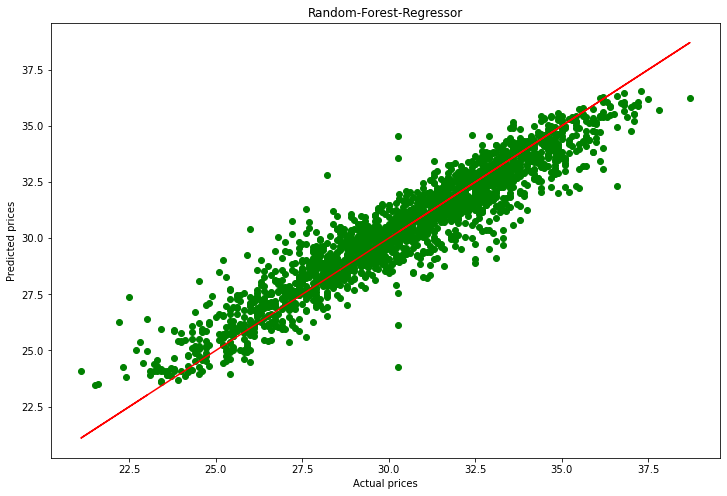

In [74]:
#ploting model results correlation-
plt.figure(figsize=(12,8))
plt.scatter(x=y_test, y=predgcv, color='g')
plt.plot(y_test,y_test,color='r')
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Random-Forest-Regressor')
plt.show()

# our model has good fitnes line.

# training with target model - Next_Tmin

In [75]:
LR=LinearRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y_Tmin,test_size=.30,random_state=i)
    LR.fit(x_train,y_train)
    pred_train=LR.predict(x_train)
    pred_test=LR.predict(x_test)
    print('At random state',i,'Training accuracy is:', r2_score(y_train,pred_train))
    print('At random state',i,'Testing accuracy is:',r2_score(y_test,pred_test))
    print('\n')

At random state 0 Training accuracy is: 0.7395651907094755
At random state 0 Testing accuracy is: 0.7248735715810686


At random state 1 Training accuracy is: 0.7367150500407464
At random state 1 Testing accuracy is: 0.7319237993146657


At random state 2 Training accuracy is: 0.7353175312362381
At random state 2 Testing accuracy is: 0.7357351275765047


At random state 3 Training accuracy is: 0.7347115010885281
At random state 3 Testing accuracy is: 0.7362357329886083


At random state 4 Training accuracy is: 0.7386725432796148
At random state 4 Testing accuracy is: 0.7272495745279153


At random state 5 Training accuracy is: 0.7343056618158376
At random state 5 Testing accuracy is: 0.7381164101563765


At random state 6 Training accuracy is: 0.7349329320061031
At random state 6 Testing accuracy is: 0.7357766586683793


At random state 7 Training accuracy is: 0.7333280410227078
At random state 7 Testing accuracy is: 0.7395765507190688


At random state 8 Training accuracy is: 0.739741

We are getting best result at 33. So our random state will be 33.

In [88]:
#we are splitting data at random satate 33
x_train,x_test,y_train,y_test=train_test_split(x,y_Tmin,test_size=.30,random_state=33)

In [89]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4821, 23), (2067, 23), (4821,), (2067,))

Different models for modelling

In [90]:
LS=Lasso()
RD=Ridge()
KNN=KNeighborsRegressor()
RF=RandomForestRegressor()
ADA=AdaBoostRegressor()
SV=SVR()

In [91]:
model=[LR,LS,RD,KNN,RF,ADA,SV]

In [92]:
for i in model:
    print('\n')
    print('******************',i,'*******************')
    print('\n')
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    pred_t=i.predict(x_train)
    score=i.score(x_train,y_train)
    print('score:',score)
    print('mean absolute error:',mean_absolute_error(y_test,pred))
    print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,pred)))
    print('r2_score:',r2_score(y_test,pred))
    cvs=cross_val_score(i, x, y_Tmin, cv=4)
    print('Cross Validation Score:',cvs.mean())



****************** LinearRegression() *******************


score: 0.7252571580555661
mean absolute error: 1.1341589321349386
Root mean squared error: 1.4902937101917664
r2_score: 0.7563214550696784
Cross Validation Score: 0.677081793675822


****************** Lasso() *******************


score: 0.5186581049302155
mean absolute error: 1.649360568658761
Root mean squared error: 2.0783708028302796
r2_score: 0.5260640846726263
Cross Validation Score: 0.4796827477865999


****************** Ridge() *******************


score: 0.7252570299240054
mean absolute error: 1.1341486213217853
Root mean squared error: 1.4902764166833602
r2_score: 0.7563271103743827
Cross Validation Score: 0.6770997070003376


****************** KNeighborsRegressor() *******************


score: 0.8978654421169103
mean absolute error: 0.8968553459119498
Root mean squared error: 1.1942605866391918
r2_score: 0.8435153455069055
Cross Validation Score: 0.5705640694948526


****************** RandomForestRegressor() 

From the above observations, we can see that, best model is Random Forest Regressor is giving the best results with  r2 score-89% , accuracy score- 98%, RMSE- 0.97 and MAE-0.72

# Hyper Parameter Tuning model

In [93]:
from sklearn.model_selection import GridSearchCV

parameters={'max_features':['auto','sqrt'],'min_samples_split':[5, 10, 15],'min_samples_leaf':[5, 10]}
gcv=GridSearchCV(RF,parameters)

In [94]:
gcv.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [5, 10, 15]})

In [95]:
#checking the best parameters
gcv.best_params_

{'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 10}

In [96]:
predgcv=gcv.best_estimator_.predict(x_test)

In [97]:
print('Mean absolute error:',mean_absolute_error(y_test,predgcv))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predgcv)))
print('r2_score:',r2_score(y_test,predgcv))
cv_score=cross_val_score(RF,x,y_Tmin,cv=5)
print('Cross Val Score is:',cv_score.mean())

Mean absolute error: 0.765516211467259
Root mean squared error: 1.0299182429330218
r2_score: 0.8836198111926616
Cross Val Score is: 0.6746384338568288


So,as we can see that there is improvement in r2 score now comes to 89%  with mae=0.76 and rmse =1.02, almost same.

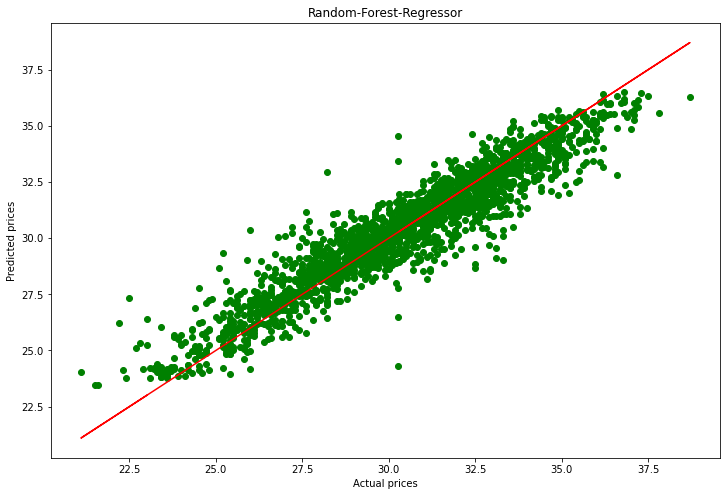

In [98]:
#ploting model results correlation-
plt.figure(figsize=(12,8))
plt.scatter(x=y_test, y=predgcv, color='g')
plt.plot(y_test,y_test,color='r')
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Random-Forest-Regressor')
plt.show()

# our model has good fitness line.

# Completed-->>